# Convolutional Neural Network

## Building the Convolutional Neural Network

#### Importing the Keras Libraries and Packages

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


Creating a convolutional neural network model to predict whether an image contains a cat or a dog.

#### Initialising the CNN

In [2]:
classifier = Sequential()

#### Convolution

The convolution stage passes the data through a filter, highlighting important features.

In [3]:
#nbfilter is the number of filters (32)
# 3,3 are the dimmension of the filter matrix
#input_shape: format of the input 64x64 is the size, 3 for color 1 if B&W
classifier.add(Convolution2D(32,3,3, input_shape=(64,64,3), activation = 'relu'))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  after removing the cwd from sys.path.


#### Pooling

The pooling stage reduces the dimensionality of the data and allows for assumptions to be made about features contained in sub-regions.

You do not need the input shape parameter for additional convolution layers.

In [4]:
classifier.add(MaxPooling2D(pool_size = (2,2)))
#classifier.add(Convolution2D(32,3,3, activation = 'relu'))
#classifier.add(MaxPooling2D(pool_size = (2,2)))

#### Flattening

The flattening stage transforms the data into a feature vector that can then be inputted into the model.

In [5]:
classifier.add(Flatten())

#### Full Connection

Creates the model using an input layer, one hidden layer and an output layer.

(Additional layer were created but were commented out).

In [6]:
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


#### Compiling the CNN

In [7]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Fitting the CNN

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

classifier.fit_generator(
        training_set,
        steps_per_epoch=8000,
        epochs=10,
        validation_data=test_set,
        validation_steps=800)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/10
8000/8000 [==============================] - 2197s 275ms/step - loss: 0.4014 - acc: 0.8105 - val_loss: 0.7164 - val_acc: 0.7602
Epoch 2/10
8000/8000 [==============================] - 2370s 296ms/step - loss: 0.1582 - acc: 0.9387 - val_loss: 1.1666 - val_acc: 0.7466
Epoch 3/10
8000/8000 [==============================] - 2757s 345ms/step - loss: 0.0799 - acc: 0.9708 - val_loss: 1.5185 - val_acc: 0.7437
Epoch 4/10
8000/8000 [==============================] - 2650s 331ms/step - loss: 0.0560 - acc: 0.9804 - val_loss: 1.5007 - val_acc: 0.7688
Epoch 5/10
8000/8000 [==============================] - 2425s 303ms/step - loss: 0.0418 - acc: 0.9859 - val_loss: 1.6186 - val_acc: 0.7639
Epoch 6/10
8000/8000 [==============================] - 2284s 286ms/step - loss: 0.0360 - acc: 0.9882 - val_loss: 1.7703 - val_acc: 0.7685
Epoch 7/10
8000/8000 [==============================] - 2675s 334ms/step - loss: 0

The accuracy of the model on the training set was 99.33% but the accuracy on the test set was only 76.58%.
Could Improve accuracy by adding another convolution layer or fully connected layer. Adding a convolutional layer has to be added after the pooling layer. Would have to also add another pooling layer. Unfortunatelly, I am running this code on my PCU instead of GPU and it takes nearly 40 mins for each epoch.

In [22]:
import numpy as np
from IPython.display import Image

/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


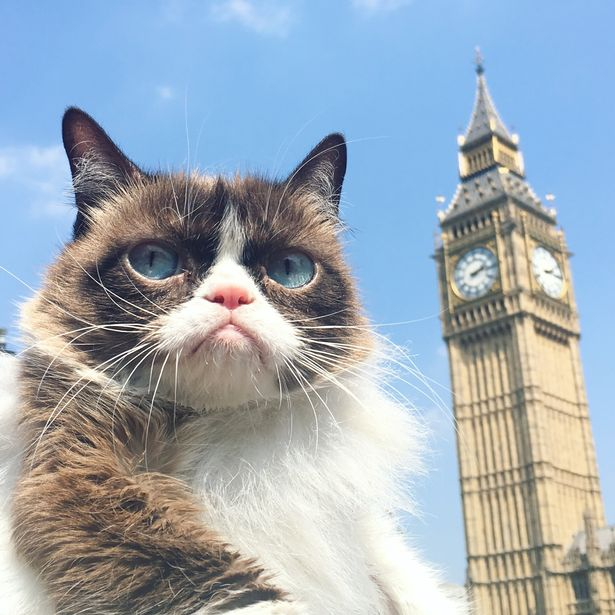

cats


In [43]:
from skimage.io import imread
from skimage.transform import resize
 
class_labels = {v: k for k, v in training_set.class_indices.items()}
 
img = imread('dataset/test_set/cats/cat.4363.jpg') 
img = resize(img,(64,64))
img = np.expand_dims(img,axis=0)
 
if(np.max(img)>1):
    img = img/255.0
 
prediction = classifier.predict_classes(img)
display(Image(filename='dataset/test_set/cats/cat.4363.jpg'))
print(class_labels[prediction[0][0]])

/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


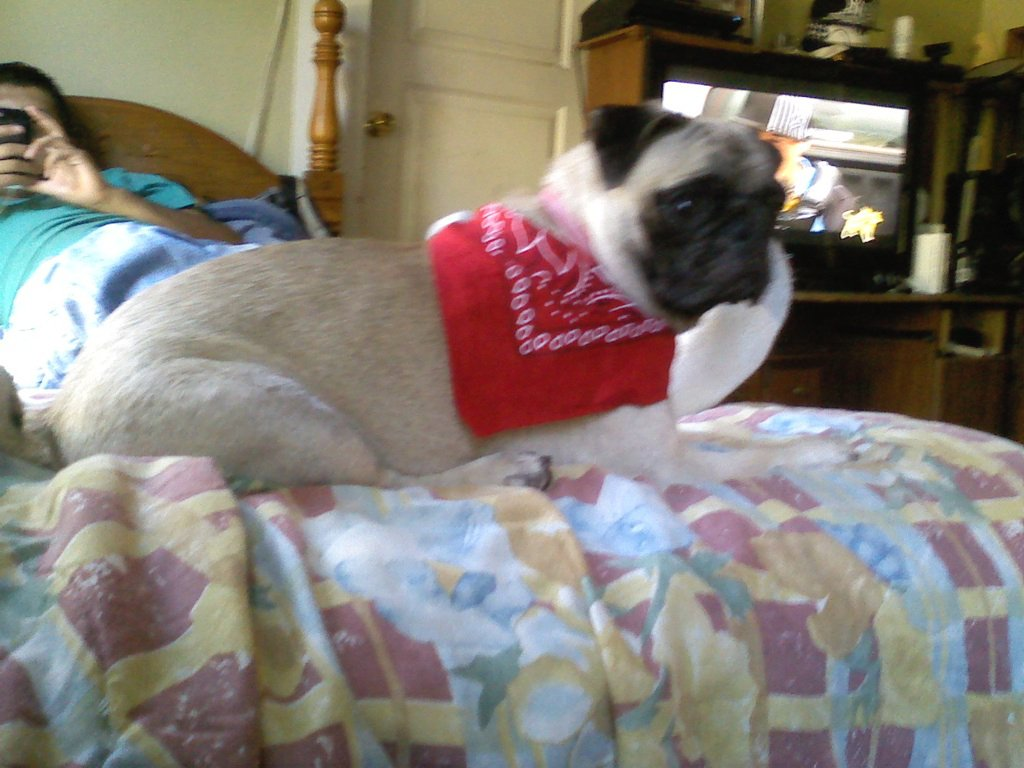

dogs


In [30]:
img = imread('Mascarita.jpg')
img = resize(img,(64,64))
img = np.expand_dims(img,axis=0)
 
if(np.max(img)>1):
    img = img/255.0
 
prediction = classifier.predict_classes(img)


display(Image(filename='Mascarita.jpg'))
print(class_labels[prediction[0][0]])

/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


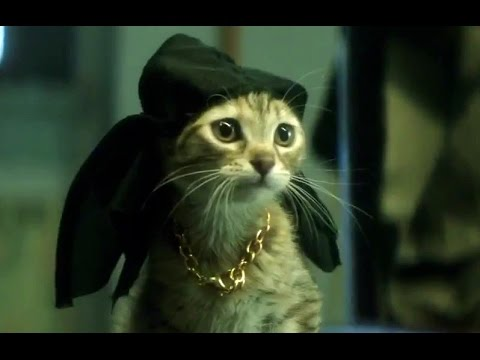

dogs


In [31]:
img = imread('Keanu.jpg')
img = resize(img,(64,64))
img = np.expand_dims(img,axis=0)
 
if(np.max(img)>1):
    img = img/255.0
 
prediction = classifier.predict_classes(img)


display(Image(filename='Keanu.jpg'))
print(class_labels[prediction[0][0]])

For fun, three pictures where tested with the model. The Grumpy cat was correctly identified as a cat, Mascarita was correctly identified as a dog but my boy Keanu the gangster cat was incorrectly labeled as a dog. 

Running on GPU would help shorten the time to run the training and validating of the data, which would help run more epochs training the data. Adding a second hidden layer would also help improve the accuracy of the model.